<a href="https://colab.research.google.com/github/thelc127/NLP-Specialization/blob/master/Week1Ch1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import nltk                                # Python library for NLP
from nltk.corpus import twitter_samples    # sample Twitter dataset from NLTK
import matplotlib.pyplot as plt            # library for visualization
import random                              # pseudo-random number generator

In [ ]:
#downloads sample twitter dataset    
nltk.download('twitter_samples')

[nltk_data] Downloading package twitter_samples to /root/nltk_data...
[nltk_data]   Unzipping corpora/twitter_samples.zip.


True

In [ ]:
#We can load the text fields of the positive and negative tweets by using the module's strings() method 
# select the set of positive and negative tweets
all_positive_tweets = twitter_samples.strings('positive_tweets.json')
all_negative_tweets = twitter_samples.strings('negative_tweets.json')

In [ ]:
print('Number of positive tweets: ', len(all_positive_tweets))
print('Number of negative tweets: ', len(all_negative_tweets))

#It is also essential to know the data structure of the datasets
print('\nThe type of all_positive_tweets is: ', type(all_positive_tweets)) 
print('The type of a tweet entry is: ', type(all_negative_tweets[0]))

Number of positive tweets:  5000
Number of negative tweets:  5000

The type of all_positive_tweets is:  <class 'list'>
The type of a tweet entry is:  <class 'str'>


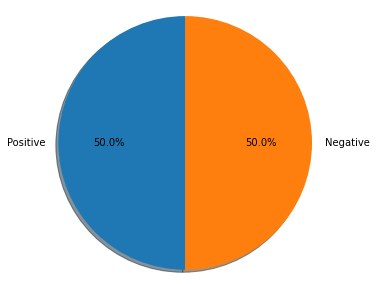

In [ ]:
# Declare a figure with a custom size
fig = plt.figure(figsize=(5, 5))

# labels for the two classes
labels = 'Positive', 'Negative'

# Sizes for each slide
sizes = [len(all_positive_tweets), len(all_negative_tweets)] 

# Declare pie chart, where the slices will be ordered and plotted counter-clockwise:
plt.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')  

# Display the chart
plt.show()

In [ ]:
# print positive in greeen
print('\033[92m' + all_positive_tweets[random.randint(0,5000)])

# print negative in red
print('\033[91m' + all_negative_tweets[random.randint(0,5000)])

#One observation you may have is the presence of emoticons and URLs in many of the tweets.

Hi BAM ! @BarsAndMelody 
Can you follow my bestfriend @969Horan696 ? 
She loves you a lot :) 
See you in Warsaw &lt;3 
Love you &lt;3 x14
😢 "@ haestarr: i’m just :(( http://t.co/FY8LWoZmob"


In [ ]:
#Preprocessing raw data for setiment analysis
   # Tokenizing the string
   # Lowercasing
   # Removing stop words and punctuation
   # Stemming

# Our selected sample. Complex enough to exemplify each step
tweet = all_positive_tweets[2277]
print(tweet)

My beautiful sunflowers on a sunny Friday morning off :) #sunflowers #favourites #happy #Friday off… https://t.co/3tfYom0N1i


In [ ]:
# download the stopwords from NLTK
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import re                                  # library for regular expression operations
import string                              # for string operations

from nltk.corpus import stopwords          # module for stop words that come with NLTK
from nltk.stem import PorterStemmer        # module for stemming
from nltk.tokenize import TweetTokenizer   # module for tokenizing strings

In [ ]:
#Remove hyperlinks, Twitter marks and styles
print('\033[92m' + tweet)
print('\033[94m')

# remove old style retweet text "RT"
tweet2 = re.sub(r'^RT[\s]+', '', tweet)

# remove hyperlinks
tweet2 = re.sub(r'https?:\/\/.*[\r\n]*', '', tweet2)

# remove hashtags
# only removing the hash # sign from the word
tweet2 = re.sub(r'#', '', tweet2)

print(tweet2)

My beautiful sunflowers on a sunny Friday morning off :) #sunflowers #favourites #happy #Friday off… https://t.co/3tfYom0N1i

My beautiful sunflowers on a sunny Friday morning off :) sunflowers favourites happy Friday off… 


In [ ]:
print()
print('\033[92m' + tweet2)
print('\033[94m')

#initialize a tokenizer class
tokenizer = TweetTokenizer(preserve_case= False, reduce_len= True, strip_handles = False)

tokens = tokenizer.tokenize(tweet2)

print("tokenized strings are :")
print(tokens)


My beautiful sunflowers on a sunny Friday morning off :) sunflowers favourites happy Friday off… 

tokenized strings are :
['my', 'beautiful', 'sunflowers', 'on', 'a', 'sunny', 'friday', 'morning', 'off', ':)', 'sunflowers', 'favourites', 'happy', 'friday', 'off', '…']


In [ ]:
#Remove stop words and punctuations
#Stop words are words that don't add significant meaning to the text. You'll see the list provided by NLTK when you run the cells below.

stopwords_of_english = stopwords.words("english") 

print("the stopwords of english are:")
print(stopwords_of_english)

print("punctuations")
print(string.punctuation)

the stopwords of english are:
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 

In [ ]:
print(tokens)

cleaned_tokens = []
for token in tokens:
  if (token not in stopwords_of_english and token not in string.punctuation):
      cleaned_tokens.append(token)

print(cleaned_tokens)

['my', 'beautiful', 'sunflowers', 'on', 'a', 'sunny', 'friday', 'morning', 'off', ':)', 'sunflowers', 'favourites', 'happy', 'friday', 'off', '…']
['beautiful', 'sunflowers', 'sunny', 'friday', 'morning', ':)', 'sunflowers', 'favourites', 'happy', 'friday', '…']


In [ ]:
#Stemming

#Stemming is the process of converting a word to its most general form, or stem. This helps in reducing the size of our vocabulary.

print(cleaned_tokens)

stemmer = PorterStemmer()

after_stemming = []
for token in cleaned_tokens:
  stemmed_words = stemmer.stem(token)
  after_stemming.append(stemmed_words)

print(after_stemming)


['beautiful', 'sunflowers', 'sunny', 'friday', 'morning', ':)', 'sunflowers', 'favourites', 'happy', 'friday', '…']
['beauti', 'sunflow', 'sunni', 'friday', 'morn', ':)', 'sunflow', 'favourit', 'happi', 'friday', '…']


In [ ]:
#That's it! Now we have a set of words we can feed into to the next stage of our machine learning project.
!pip install utils



In [ ]:
#use the function process_tweet(tweet) available in utils.py
#To obtain the same result as in the previous code cells, you will only need to call the function process_tweet(). Let's do that.

# from utils import process_tweet # Import the process_tweet function

# # choose the same tweet
# tweet = all_positive_tweets[2277]

# print()
# print('\033[92m')
# print(tweet)
# print('\033[94m')

# # call the imported function
# tweets_stem = process_tweet(tweet); # Preprocess a given tweet

# print('preprocessed tweet:')
# print(tweets_stem) # Print the result